In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_csv("/kaggle/input/student-performance-prediction/student_performance_prediction.csv")
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [142]:
df.shape

(40000, 7)

In [143]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [144]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


**EDA**-Exploratory Data Analysis

Checking for null values, Checking for duplicates, Checking discrepencies in data, Checking for outliers, Visual analysis

In [146]:
#checking for null values
df.isnull().sum().sum()

11981

In [147]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [148]:
#Handle missing values for numerical columns 

df['Study Hours per Week'].fillna(df['Study Hours per Week'].median(), inplace= True)
df['Attendance Rate'].fillna(df['Attendance Rate'].median(), inplace= True)
df['Previous Grades'].fillna(df['Previous Grades'].median(), inplace= True)

In [149]:
#Handle missing values for categorical columns 
df['Participation in Extracurricular Activities'].fillna(df['Participation in Extracurricular Activities'].mode()[0], inplace= True)
df['Parent Education Level'].fillna(df['Parent Education Level'].mode()[0], inplace= True)

In [150]:
#checking for duplicates
df.duplicated().sum()

0

In [177]:
# Correct negative and unrealistic values in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades'

# Study Hours per Week: Remove negative values
df=df[df['Study Hours per Week'] >= 0]

# Attendance Rate: Remove negative values and values above 100%
df=df[(df['Attendance Rate'] >= 0) & (df['Attendance Rate'] <= 100)]
# Previous Grades: Remove values above 100
df=df[df['Previous Grades'] <= 100 ]
# Drop any remaining missing values if needed
cleanedData =df.dropna()
cleanedData

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,0,12.5,75.3,75.0,1,4,1
1,1,9.3,95.3,60.6,0,3,0
2,2,13.2,75.3,64.0,0,0,0
3,3,17.6,76.8,62.4,1,1,0
4,4,8.8,89.3,72.7,0,4,0
...,...,...,...,...,...,...,...
39995,32843,15.6,93.8,51.4,1,4,0
39996,32844,11.3,66.4,64.2,0,2,1
39997,32845,13.1,65.6,38.1,0,1,0
39998,32846,14.1,74.9,65.2,1,4,0


In [180]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

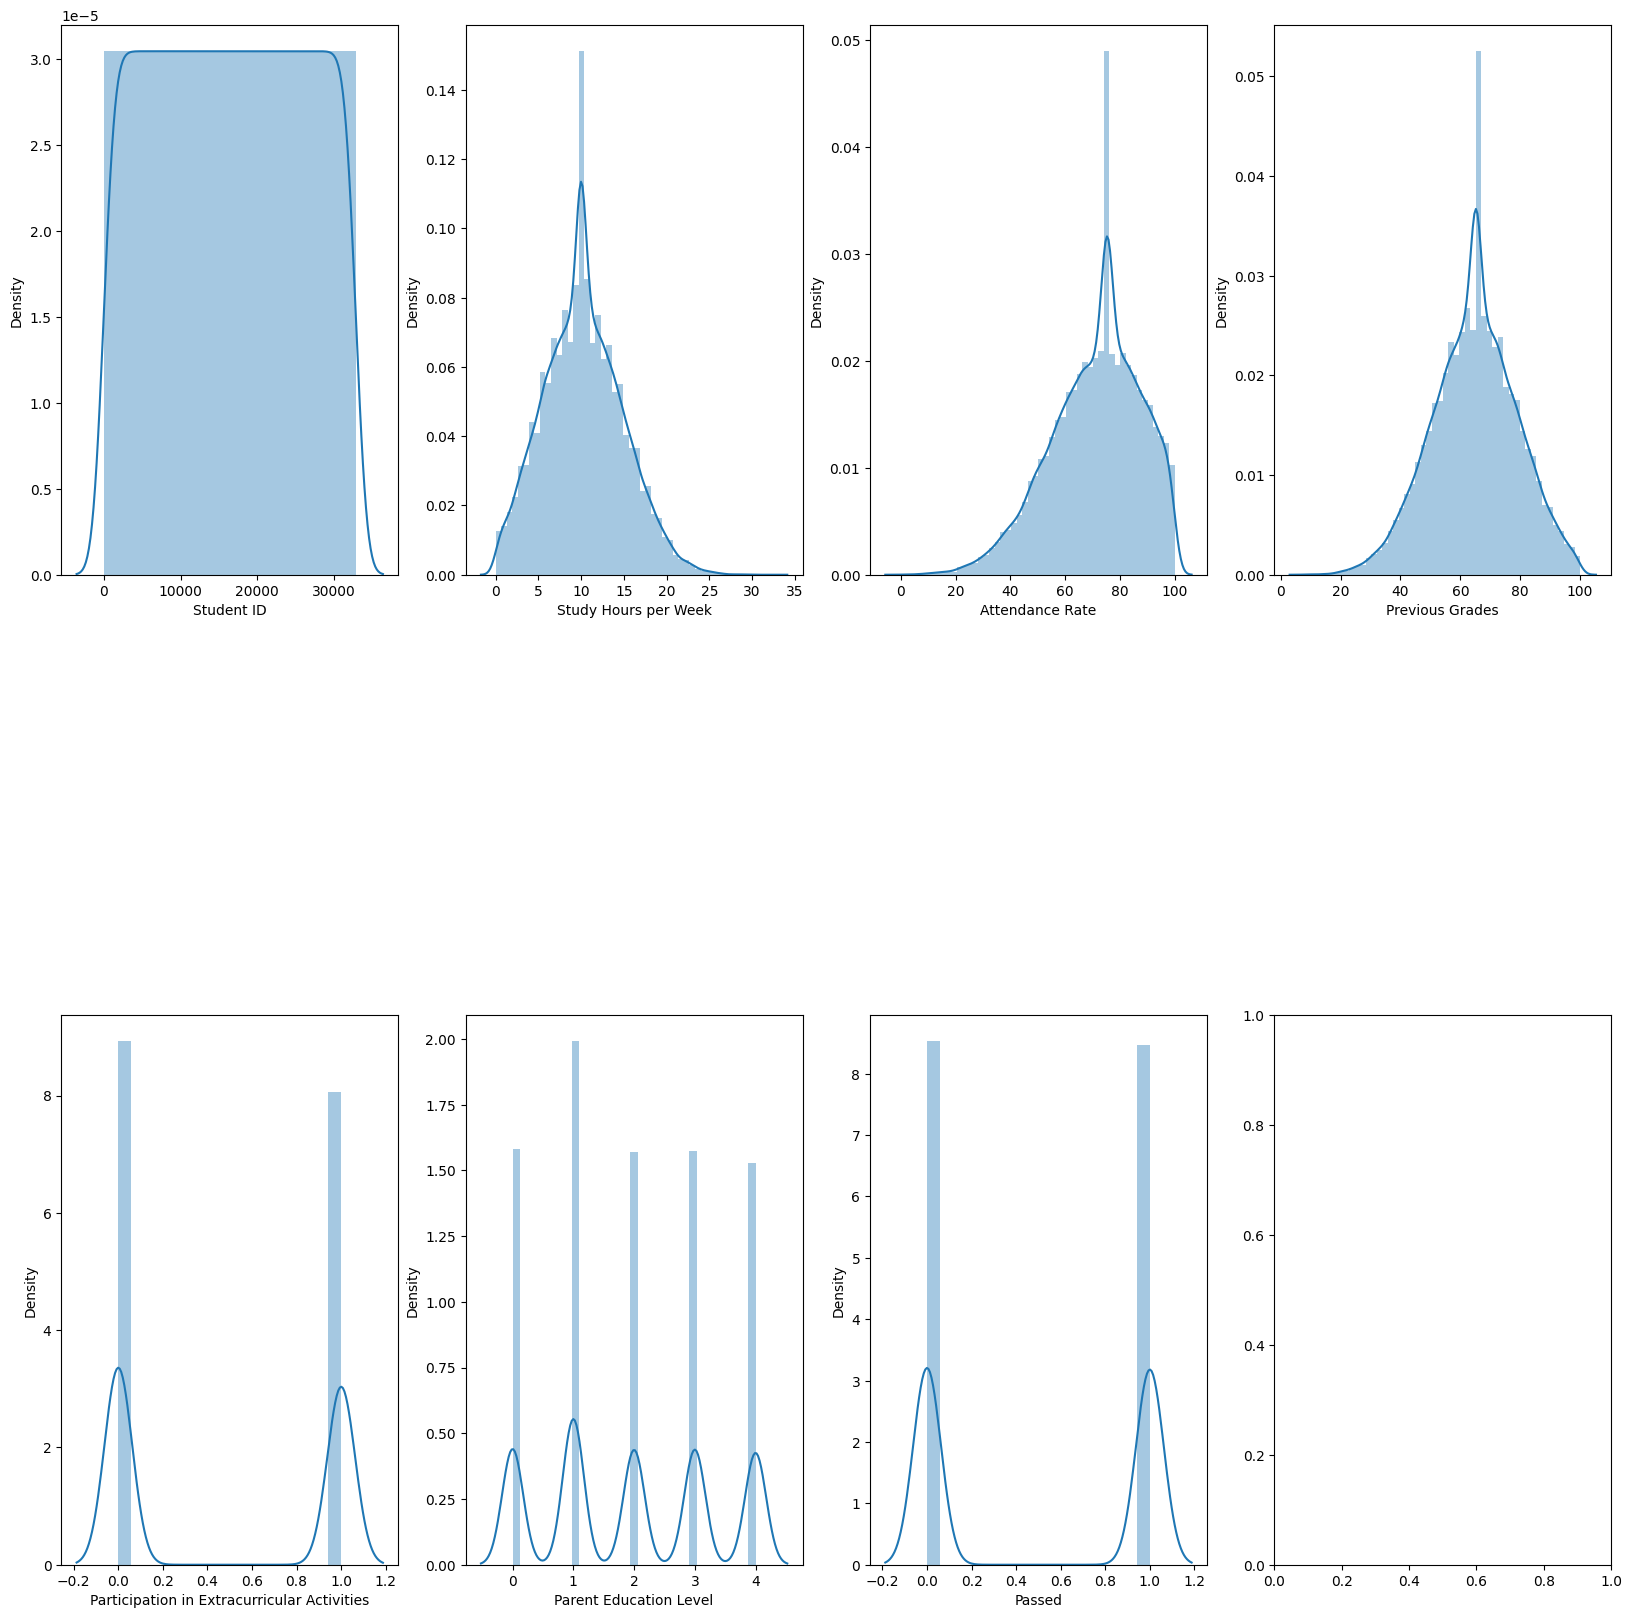

In [157]:
#visualization

#Converting object dtypes to numerics ---Encoding---feature engineering
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=le.fit_transform(df[i])
        df[i]=df[i].astype(int)

a=1
plt.subplots(2,4,figsize=(20,20))
for i in df.columns:
    #plt.title(i)
    plt.subplot(2,4,a)
    sns.distplot(df[i])
    a+=1
    
plt.subplots_adjust(hspace=0.8)
plt.show()

**Feature Selection**

In [158]:
# 1. Correlation Analysis
x = df.corr()
x

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
Student ID,1.000000,-0.006961,-0.003921,0.000350,0.011493,0.004916,-0.005856
Study Hours per Week,-0.006961,1.000000,0.001968,0.003654,0.005371,-0.005570,-0.013062
Attendance Rate,-0.003921,0.001968,1.000000,-0.002767,0.006113,0.000898,0.001234
Previous Grades,0.000350,0.003654,-0.002767,1.000000,0.000268,-0.002182,-0.003816
Participation in Extracurricular Activities,0.011493,0.005371,0.006113,0.000268,1.000000,0.005255,0.000585
Parent Education Level,0.004916,-0.005570,0.000898,-0.002182,0.005255,1.000000,0.001563
Passed,-0.005856,-0.013062,0.001234,-0.003816,0.000585,0.001563,1.000000


<Axes: >

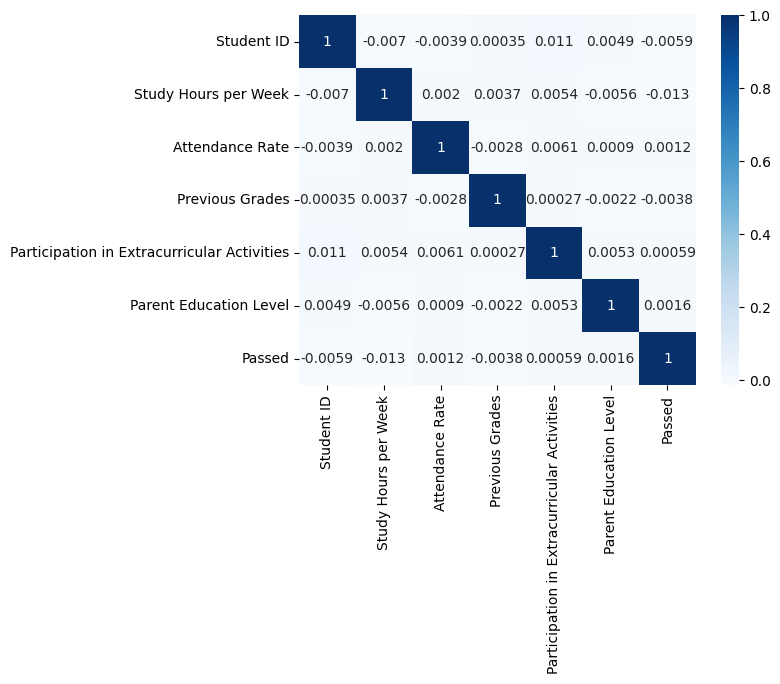

In [159]:
sns.heatmap(x, annot=True,cmap="Blues")

In [160]:
#target feature with all other features have low correlation value. So we do VIF for feature selection
#VIF - variance inflation factor --> helps to calculate multicollinearity
col_list=[]
for col in df.columns:
    if (df[col].dtype != 'object') & (col != 'y'):
        col_list.append(col)
col_list

['Student ID',
 'Study Hours per Week',
 'Attendance Rate',
 'Previous Grades',
 'Participation in Extracurricular Activities',
 'Parent Education Level',
 'Passed']

In [161]:
x = df[col_list]
x

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,0,12.5,75.3,75.0,1,4,1
1,1,9.3,95.3,60.6,0,3,0
2,2,13.2,75.3,64.0,0,0,0
3,3,17.6,76.8,62.4,1,1,0
4,4,8.8,89.3,72.7,0,4,0
...,...,...,...,...,...,...,...
39995,32843,15.6,93.8,51.4,1,4,0
39996,32844,11.3,66.4,64.2,0,2,1
39997,32845,13.1,65.6,38.1,0,1,0
39998,32846,14.1,74.9,65.2,1,4,0


In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
vif_data=pd.DataFrame()    #to add multicollinearity values for every column
vif_data["Features"] = x.columns
vif_data["Multicollinearity"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,Multicollinearity
0,Student ID,3.768376
1,Study Hours per Week,5.415106
2,Attendance Rate,12.755529
3,Previous Grades,13.217948
4,Participation in Extracurricular Activities,1.875718
5,Parent Education Level,2.827673
6,Passed,1.951155


In [164]:
#Previous Grades have more multicollinearity so remove it
x.drop(['Previous Grades'],axis=1,inplace=True)

In [165]:
vif_data=pd.DataFrame()    #to add multicollinearity values for every column
vif_data["Features"] = x.columns
vif_data["Multicollinearity"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Features,Multicollinearity
0,Student ID,3.613022
1,Study Hours per Week,5.025011
2,Attendance Rate,8.075515
3,Participation in Extracurricular Activities,1.856915
4,Parent Education Level,2.758273
5,Passed,1.925990


Effect of Parent Education Level on Student Grades and Passing Rate:
   Parent Education Level  Previous Grades    Passed
0                       0        64.809489  0.490162
1                       1        64.643527  0.499811
2                       2        64.954413  0.506716
3                       3        64.404419  0.499123
4                       4        64.809622  0.493432


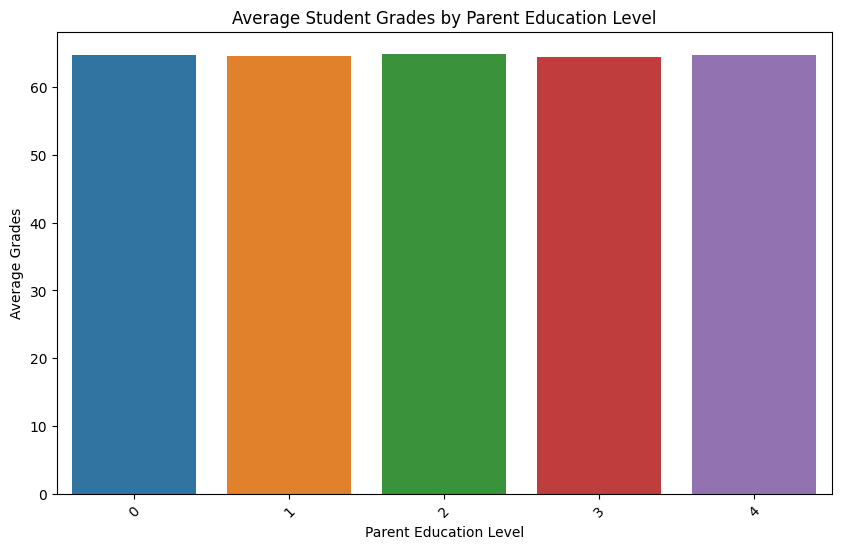

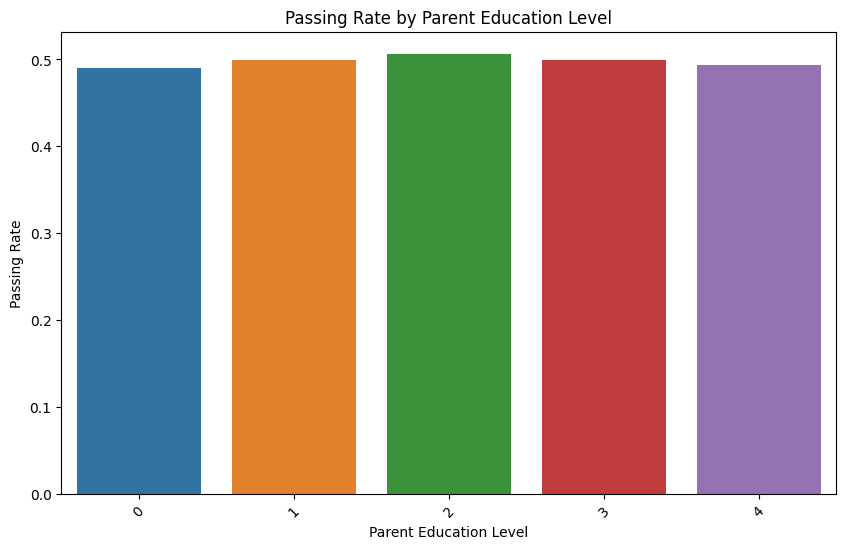

In [166]:
grouped_by_parent_education = df.groupby('Parent Education Level').agg({
    'Previous Grades': 'mean',
    'Passed': 'mean'
}).reset_index()

print("Effect of Parent Education Level on Student Grades and Passing Rate:")
print(grouped_by_parent_education)

# 2. Visualizing the relationship between Parent Education Level, Grades, and Passing Rate

# Plotting the average grades by parent education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Parent Education Level', y='Previous Grades', data=grouped_by_parent_education)
plt.title('Average Student Grades by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Average Grades')
plt.xticks(rotation=45)
plt.show()


# Plotting the passing rate by parent education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Parent Education Level', y='Passed', data=grouped_by_parent_education)
plt.title('Passing Rate by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Passing Rate')
plt.xticks(rotation=45)
plt.show()

In [167]:
#2. Group Comparisons
# Compare the means of the features between students who passed and those who didn't
numeric_columns = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']
grouped_data = df.groupby('Passed')[numeric_columns].mean()
print("\nGroup Comparisons (Mean Values):")
print(grouped_data)


Group Comparisons (Mean Values):
        Study Hours per Week  Attendance Rate  Previous Grades
Passed                                                        
0                  10.304336        71.183912        64.773385
1                  10.184386        71.224357        64.665611


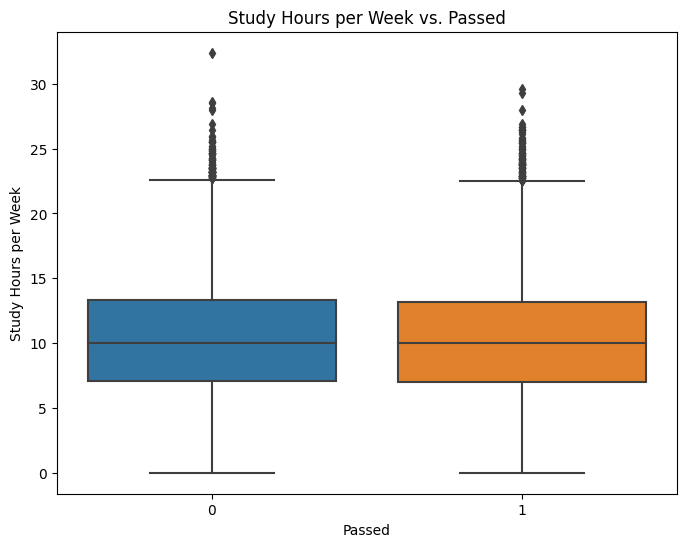

In [168]:
# 3. Visualizing Relationships
# Study Hours vs. Passed
plt.figure(figsize=(8, 6))
sns.boxplot(x='Passed', y='Study Hours per Week', data=df)
plt.title('Study Hours per Week vs. Passed')
plt.xlabel('Passed')
plt.ylabel('Study Hours per Week')
plt.show()

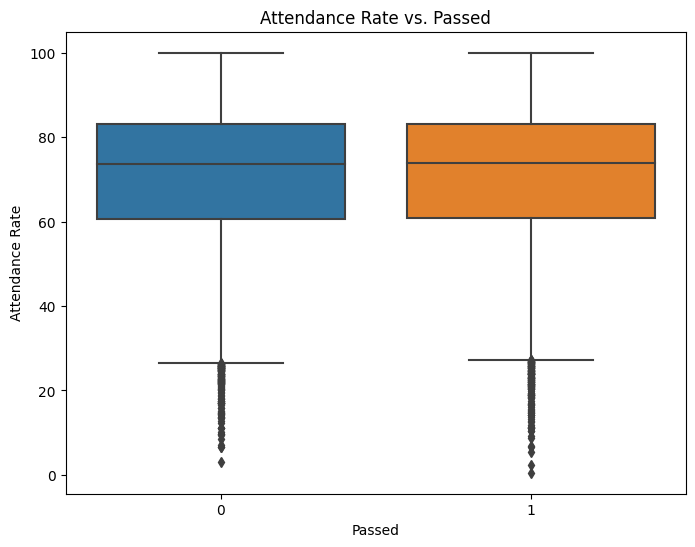

In [169]:
# Attendance Rate vs. Passed
plt.figure(figsize=(8, 6))
sns.boxplot(x='Passed', y='Attendance Rate', data=df)
plt.title('Attendance Rate vs. Passed')
plt.xlabel('Passed')
plt.ylabel('Attendance Rate')
plt.show()

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, roc_curve,auc

In [184]:
# 2. Define features (X) and target (y)
X = df.drop(columns=['Student ID', 'Passed'])
y = df['Passed']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 4. Train a Random Forest Classifier
model_rf= RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred_rf= model_rf.predict(X_test)

# 6. Evaluate the model

print("\nAccuracy using RandomForestClassifier:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy using RandomForestClassifier: 0.5036529680365297
Confusion Matrix:
[[3454 3059]
 [3463 3164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51      6513
           1       0.51      0.48      0.49      6627

    accuracy                           0.50     13140
   macro avg       0.50      0.50      0.50     13140
weighted avg       0.50      0.50      0.50     13140



In [185]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy using LogisticRegression: {accuracy:.2f}')

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# 3. Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy using LogisticRegression: 0.50
Confusion Matrix:
[[4786 1727]
 [4866 1761]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.73      0.59      6513
           1       0.50      0.27      0.35      6627

    accuracy                           0.50     13140
   macro avg       0.50      0.50      0.47     13140
weighted avg       0.50      0.50      0.47     13140



In [186]:
# Train a Logistic Regression model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy using DecisionTreeClassifier : {accuracy:.2f}')

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# 3. Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy using DecisionTreeClassifier : 0.50
Confusion Matrix:
[[3234 3279]
 [3339 3288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.49      6513
           1       0.50      0.50      0.50      6627

    accuracy                           0.50     13140
   macro avg       0.50      0.50      0.50     13140
weighted avg       0.50      0.50      0.50     13140

